In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils

In [40]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json
from datasets import PictureDataset
from torch.utils.data import DataLoader

In [149]:
def load_image(path):
    image = Image.open(path)
    plt.imshow(image)
    plt.rcParams["figure.figsize"] = (4, 4)
    #plt.title("Image loaded successfully")
    return image

def transform(image):
    return transforms.ToTensor()(image)

def to_grayscale(image):
    """
    input is (d,w,h)
    converts 3D image tensor to grayscale images corresponding to each channel
    """
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

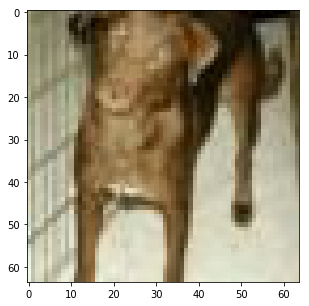

In [150]:
image = load_image("data/trainset/1.Dog.jpg")


In [151]:
import neuralnets
best_model = neuralnets.KaggleNetSimple(2).to("cpu")
best_model.load_state_dict(torch.load("2019-02-11_lr_0.001.pt", map_location="cpu"))

In [152]:
modulelist = [best_model.layer1,nn.ReLU(), best_model.layer2, nn.ReLU(), best_model.layer3,nn.ReLU(), best_model.layer4,nn.ReLU(), best_model.layer5,nn.ReLU(), best_model.layer6 , nn.ReLU()]

In [167]:

def layer_outputs(image):
    outputs = []
    names = []
    for layer in modulelist:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
        
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (30, 50)

    for i in range(len(output_im)):
        a = fig.add_subplot(8,4,i+1)
        imgplot = plt.imshow(output_im[i])
        
        plt.axis('off')
        a.set_title(names[i].partition('(')[0], fontsize=30)

    plt.show()
    #plt.savefig("img.png")

In [168]:
test_dataset = PictureDataset("data/trainset/", transform=transforms.ToTensor())


In [171]:
test_loader = DataLoader(
        test_dataset, 1
    )

itr = iter(test_loader)
first_img = next(itr)
second_img = next(itr)
third_img = next(itr)

img = second_img[0]
print(second_img[2])
#plt.rcParams["figure.figsize"] = (15, 5)

#load_image("data/trainset/63.Cat.jpg")

('63.Cat.jpg',)


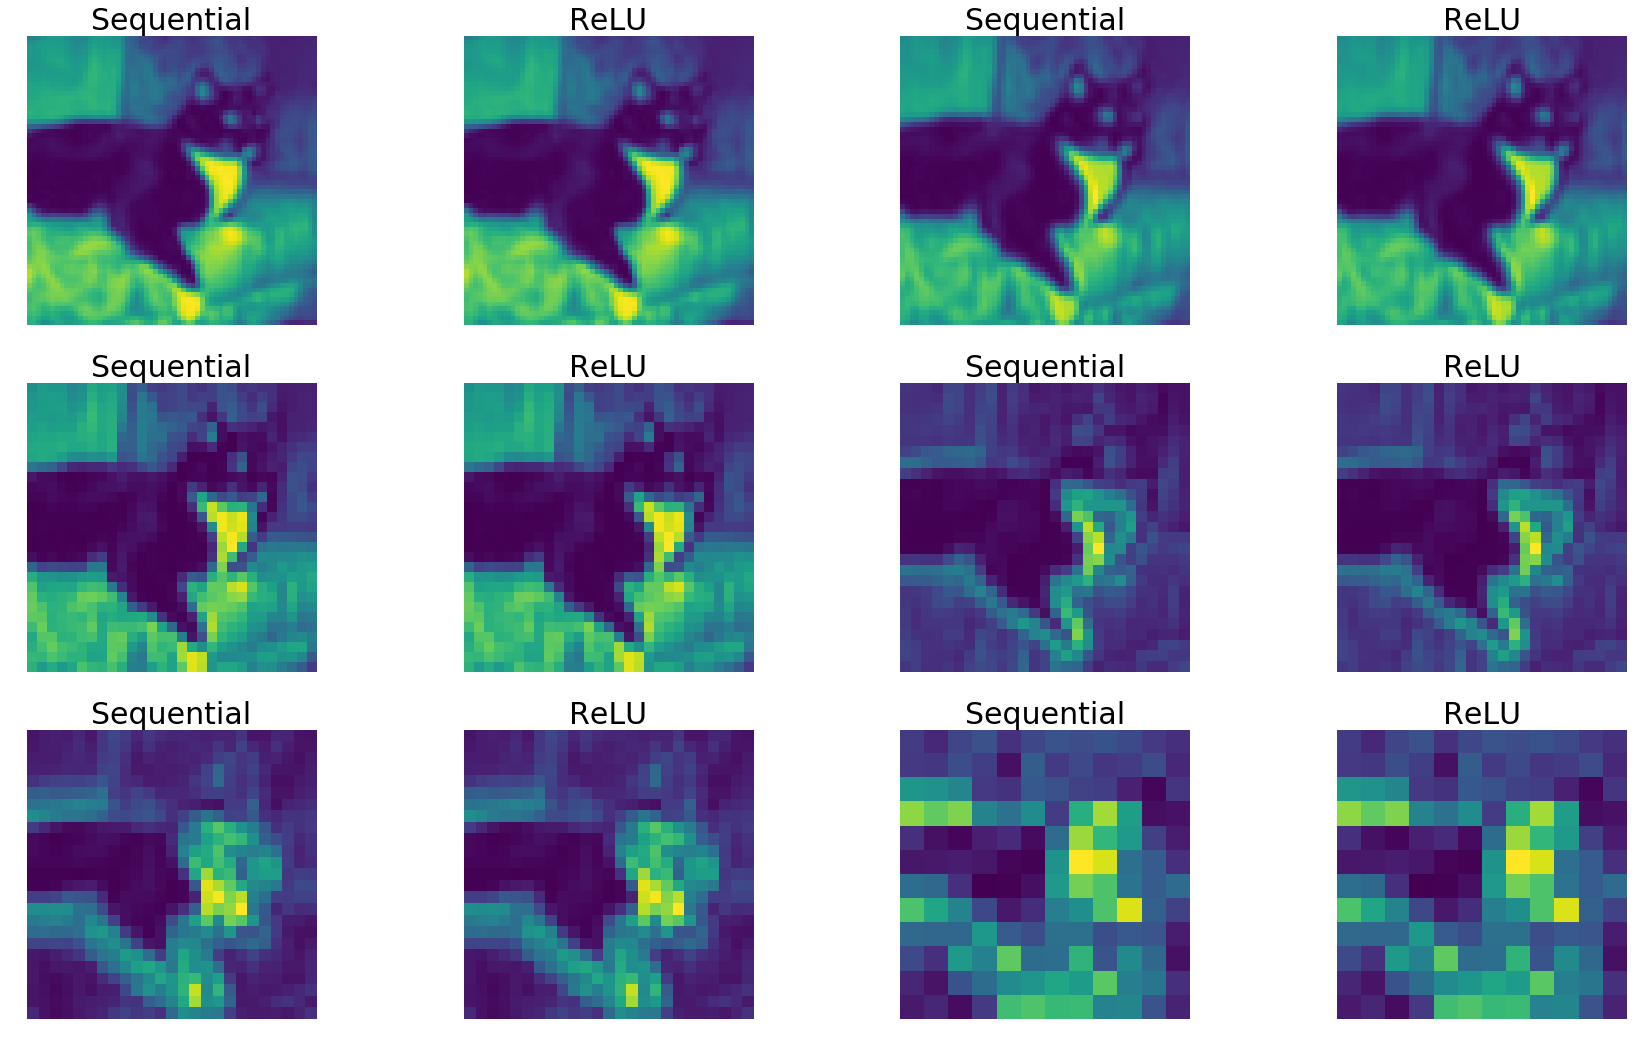

In [172]:

layer_outputs(img)